### Number of Parameters v.s. Generalization

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
if torch.cuda.is_available():
    print("CUDA is available. You can run your code on GPU!")
else:
    print("CUDA is not available. Running on CPU instead.")

CUDA is available. You can run your code on GPU!


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
# Data loading and transformation
batch_size = 64  
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [5]:
class Model0(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 16)
        self.fc2 = nn.Linear(16, 10)


    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 48)
        self.fc2 = nn.Linear(48, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Model4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 80)
        self.fc2 = nn.Linear(80, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

class Model5(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 96)
        self.fc2 = nn.Linear(96, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 112)
        self.fc2 = nn.Linear(112, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class Model7(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Model8(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x



class Model9(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model_list = [Model0(), Model1(), Model2(), Model3(), Model4(), Model5(), Model6(), Model7(), Model8(), Model9()]
# model_list = [Model0(), Model1()]

In [6]:
def params_count(model):
    return sum(params.numel() for params in model.parameters() if params.requires_grad)

def test_test_data(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            images, labels = images.to(device).reshape(-1, 28*28), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data,dim=1)      
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
            
    return correct/total

def test_train_data(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_loader:
            images,labels = data
            images, labels = images.to(device).reshape(-1, 28*28), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data,dim=1)      
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
            
    return correct/total

In [7]:
def evaluate_test_loss(dataloader, model): 
    loss_fn = nn.CrossEntropyLoss()
    
    model.eval()
    
    # train and store epoch training loss
    epoch_test_loss = 0.0
    for batch, (X_test, y_test) in enumerate(dataloader): 
        X_test = X_test.to(device).reshape(-1, 28*28)
        y_test = y_test.to(device)

        # compute model predictions and loss
        y_pred = model(X_test)
        loss = loss_fn(y_pred, y_test)

        # update epoch loss with batch loss (epoch loss := mean batch loss throughout all batches)
        epoch_test_loss += loss.item() / len(dataloader)
    
    # return epoch loss
    return epoch_test_loss

In [8]:
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
params_list = []

for model in tqdm(model_list):    
    params_list.append(sum(p.numel() for p in model.parameters()))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    num_epochs = 20

    # Train the model
    # for epoch in tqdm(range(num_epochs), desc='Epochs', unit='epoch'):
    for epoch in range(num_epochs):
        model = model.to(device)
        model.train()
        loss_per_epoch = 0

        # Batch processing with progress bar
        for images, labels in train_loader:
            images = images.to(device).reshape(-1, 28*28)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_per_epoch += loss.item()

        # Normalize the loss by the number of batches
        loss_per_epoch /= len(train_loader)
        
        # End of epoch
        # tqdm.write(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss_per_epoch:.4f}')


    # Record the performance after training
    train_loss_list.append(loss_per_epoch)
    test_loss_list.append(evaluate_test_loss(test_loader, model))
    train_acc_list.append(test_train_data(model))
    test_acc_list.append(test_test_data(model))

100%|██████████| 10/10 [18:50<00:00, 113.02s/it]


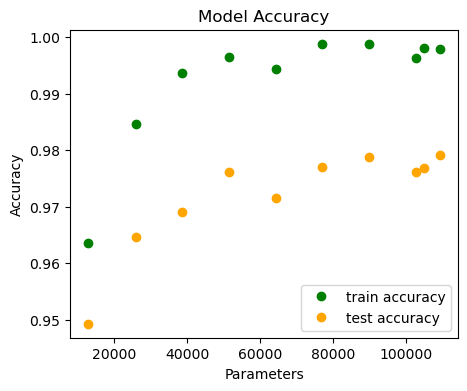

In [25]:
# Plotting Accuracies
plt.figure(figsize=(5,4))
plt.plot(params_list, train_acc_list, color='green', marker='o', linestyle='', label="train accuracy")
plt.plot(params_list, test_acc_list, color='orange', marker='o', linestyle='', label="test accuracy")
plt.legend()
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

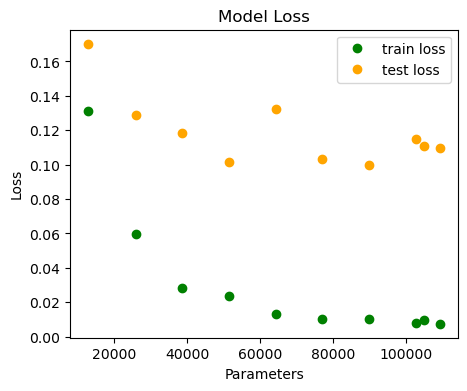

In [26]:
# Plotting Loss
plt.figure(figsize=(5,4))
plt.plot(params_list, train_loss_list, color='green', marker='o', linestyle='', label = "train loss")
plt.plot(params_list, test_loss_list, color='orange', marker='o', linestyle='',label = "test loss")
plt.legend()
plt.xlabel("Parameters")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.show()